In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('./nba_scraped_data.csv')
df

,#,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF,YEAR
0,2023-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Joel Embiid,PHI,23.0,34.0,34.4,11.6,21.7,53.4,1.1,...,89.0,2.9,8.9,11.8,6.0,1.1,1.9,3.8,40.0,2023-24
2,2,Luka Doncic,DAL,25.0,36.7,32.9,11.3,23.1,49.0,3.9,...,79.0,0.8,7.6,8.4,9.1,1.3,0.5,4.0,34.7,2023-24
3,3,Kevin Durant,PHX,23.0,36.7,31.0,10.8,20.8,51.8,2.2,...,87.0,0.4,5.7,6.1,5.6,0.8,1.1,3.4,30.1,2023-24
4,4,Shai Gilgeous-Alexander,OKC,24.0,34.7,30.7,11.1,20.6,53.8,1.0,...,91.4,0.9,4.8,5.7,6.4,2.8,0.8,2.0,34.0,2023-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,256,Jaxson Hayes,LAL,24.0,11.3,3.2,1.3,2.0,66.0,0.0,...,56.0,0.5,1.5,2.0,0.3,0.3,0.4,0.6,4.4,2023-24
257,257,Tristan Thompson,CLE,22.0,10.4,3.0,1.3,1.8,71.8,0.0,...,36.0,1.5,1.8,3.3,0.7,0.1,0.4,0.5,5.7,2023-24
258,258,Andre Jackson Jr.,MIL,21.0,10.5,3.0,1.2,2.0,59.5,0.5,...,50.0,0.9,1.0,1.9,1.0,0.3,0.0,0.5,4.7,2023-24
259,259,Cody Zeller,NOP,22.0,10.0,1.9,0.6,1.8,33.3,0.0,...,57.7,1.2,1.9,3.1,1.2,0.2,0.1,0.4,4.4,2023-24


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       261 non-null    object 
 1   PLAYER  260 non-null    object 
 2   TEAM    260 non-null    object 
 3   GP      260 non-null    float64
 4   MIN     260 non-null    float64
 5   PTS     260 non-null    float64
 6   FGM     260 non-null    float64
 7   FGA     260 non-null    float64
 8   FG%     260 non-null    float64
 9   3PM     260 non-null    float64
 10  3PA     260 non-null    float64
 11  3P%     260 non-null    float64
 12  FTM     260 non-null    float64
 13  FTA     260 non-null    float64
 14  FT%     260 non-null    float64
 15  OREB    260 non-null    float64
 16  DREB    260 non-null    float64
 17  REB     260 non-null    float64
 18  AST     260 non-null    float64
 19  STL     260 non-null    float64
 20  BLK     260 non-null    float64
 21  TOV     260 non-null    float64
 22  EF

# Data Cleaning

In [38]:
# Drop rows that have 'NaN' values and '#' column
df = df.dropna()
df = df.drop('#', axis=1)

In [39]:
# Create a rearranged list 
arrange_columns = ['PLAYER', 'YEAR','TEAM', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF']

# Set dataframe to new columns
df = df[arrange_columns]

df.head()

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,23.0,34.0,34.4,11.6,21.7,53.4,1.1,...,11.4,89.0,2.9,8.9,11.8,6.0,1.1,1.9,3.8,40.0
2,Luka Doncic,2023-24,DAL,25.0,36.7,32.9,11.3,23.1,49.0,3.9,...,8.0,79.0,0.8,7.6,8.4,9.1,1.3,0.5,4.0,34.7
3,Kevin Durant,2023-24,PHX,23.0,36.7,31.0,10.8,20.8,51.8,2.2,...,8.3,87.0,0.4,5.7,6.1,5.6,0.8,1.1,3.4,30.1
4,Shai Gilgeous-Alexander,2023-24,OKC,24.0,34.7,30.7,11.1,20.6,53.8,1.0,...,8.2,91.4,0.9,4.8,5.7,6.4,2.8,0.8,2.0,34.0
5,Giannis Antetokounmpo,2023-24,MIL,26.0,34.7,30.6,11.4,18.7,61.1,0.4,...,11.2,66.2,2.7,8.4,11.1,5.4,1.5,1.2,3.8,34.8


In [40]:
# Show the change
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 260
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  260 non-null    object 
 1   YEAR    260 non-null    object 
 2   TEAM    260 non-null    object 
 3   GP      260 non-null    float64
 4   MIN     260 non-null    float64
 5   PTS     260 non-null    float64
 6   FGM     260 non-null    float64
 7   FGA     260 non-null    float64
 8   FG%     260 non-null    float64
 9   3PM     260 non-null    float64
 10  3PA     260 non-null    float64
 11  3P%     260 non-null    float64
 12  FTM     260 non-null    float64
 13  FTA     260 non-null    float64
 14  FT%     260 non-null    float64
 15  OREB    260 non-null    float64
 16  DREB    260 non-null    float64
 17  REB     260 non-null    float64
 18  AST     260 non-null    float64
 19  STL     260 non-null    float64
 20  BLK     260 non-null    float64
 21  TOV     260 non-null    float64
 22  EF

# Visualization

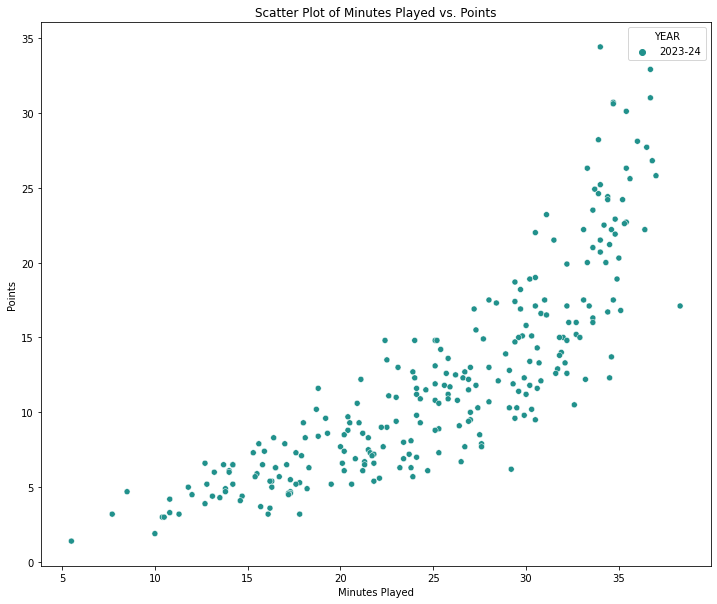

In [41]:
# Create a scatter plot on minutes vs points scored
plt.figure(figsize=(12, 10))
sns.scatterplot(x='MIN', y='PTS', data=df, hue='YEAR', palette='viridis')
plt.title('Scatter Plot of Minutes Played vs. Points')
plt.xlabel('Minutes Played')
plt.ylabel('Points')
plt.show()


In [42]:
# Find the top 10 players with the most assists the of the 2023-24 season
assists_df = df.loc[df['AST'] >=6].head(10)
assists_df.sort_values(by='AST', ascending=False, inplace=True)
assists_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
16,Tyrese Haliburton,2023-24,IND,22.0,33.7,24.9,8.7,17.2,50.7,3.5,...,4.5,86.9,0.7,3.4,4.0,11.9,0.9,0.6,2.6,30.6
8,Trae Young,2023-24,ATL,24.0,36.0,28.1,8.7,20.3,42.9,3.4,...,8.3,87.5,0.6,2.4,3.0,11.0,1.3,0.2,4.2,26.7
11,Nikola Jokic,2023-24,DEN,27.0,33.3,26.3,10.2,18.9,53.8,1.1,...,6.1,78.9,3.3,9.0,12.3,9.4,1.2,0.7,2.7,37.3
2,Luka Doncic,2023-24,DAL,25.0,36.7,32.9,11.3,23.1,49.0,3.9,...,8.0,79.0,0.8,7.6,8.4,9.1,1.3,0.5,4.0,34.7
15,LeBron James,2023-24,LAL,25.0,34.0,25.2,9.4,17.4,53.9,2.3,...,5.8,71.5,1.0,6.7,7.6,7.2,1.5,0.6,3.3,29.2
12,Damian Lillard,2023-24,MIL,25.0,35.4,26.3,7.7,17.4,44.1,3.3,...,8.4,91.9,0.6,3.9,4.5,7.0,1.1,0.2,2.7,26.0
13,Tyrese Maxey,2023-24,PHI,25.0,37.0,25.8,8.8,19.2,46.0,3.2,...,5.4,89.6,0.6,3.4,4.0,6.7,0.9,0.6,1.4,25.6
4,Shai Gilgeous-Alexander,2023-24,OKC,24.0,34.7,30.7,11.1,20.6,53.8,1.0,...,8.2,91.4,0.9,4.8,5.7,6.4,2.8,0.8,2.0,34.0
6,De'Aaron Fox,2023-24,SAC,19.0,35.4,30.1,10.5,22.1,47.7,3.2,...,8.1,72.7,0.8,3.6,4.4,6.4,1.5,0.3,2.5,26.5
1,Joel Embiid,2023-24,PHI,23.0,34.0,34.4,11.6,21.7,53.4,1.1,...,11.4,89.0,2.9,8.9,11.8,6.0,1.1,1.9,3.8,40.0


In [43]:
# Find the top 10 players with the most rebounds the of the 2023-24 season
rebounds_df = df.loc[df['REB'] > 6].head(10)
rebounds_df .sort_values(by='REB', ascending=False, inplace=True)
rebounds_df 

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
19,Anthony Davis,2023-24,LAL,25.0,35.2,24.2,9.2,16.7,54.9,0.3,...,6.9,82.0,3.5,9.0,12.6,3.0,1.1,2.6,2.0,32.7
11,Nikola Jokic,2023-24,DEN,27.0,33.3,26.3,10.2,18.9,53.8,1.1,...,6.1,78.9,3.3,9.0,12.3,9.4,1.2,0.7,2.7,37.3
1,Joel Embiid,2023-24,PHI,23.0,34.0,34.4,11.6,21.7,53.4,1.1,...,11.4,89.0,2.9,8.9,11.8,6.0,1.1,1.9,3.8,40.0
5,Giannis Antetokounmpo,2023-24,MIL,26.0,34.7,30.6,11.4,18.7,61.1,0.4,...,11.2,66.2,2.7,8.4,11.1,5.4,1.5,1.2,3.8,34.8
25,Julius Randle,2023-24,NYK,26.0,35.3,22.6,8.3,17.8,46.4,1.6,...,6.0,74.4,2.1,7.5,9.6,5.2,0.6,0.2,3.3,23.9
28,Karl-Anthony Towns,2023-24,MIN,25.0,33.1,22.2,8.0,15.6,51.5,2.0,...,4.6,90.4,1.6,7.8,9.5,3.0,0.9,0.7,2.8,25.4
10,Jayson Tatum,2023-24,BOS,26.0,36.8,26.8,9.3,19.5,47.6,3.0,...,6.6,79.5,0.9,7.8,8.7,4.2,1.0,0.5,3.0,26.7
2,Luka Doncic,2023-24,DAL,25.0,36.7,32.9,11.3,23.1,49.0,3.9,...,8.0,79.0,0.8,7.6,8.4,9.1,1.3,0.5,4.0,34.7
15,LeBron James,2023-24,LAL,25.0,34.0,25.2,9.4,17.4,53.9,2.3,...,5.8,71.5,1.0,6.7,7.6,7.2,1.5,0.6,3.3,29.2
3,Kevin Durant,2023-24,PHX,23.0,36.7,31.0,10.8,20.8,51.8,2.2,...,8.3,87.0,0.4,5.7,6.1,5.6,0.8,1.1,3.4,30.1


In [44]:
# Find the top 10 scorers of the 2023-24 season
top_ten_df = df.loc[df['YEAR'] == '2023-24'].head(10)
top_ten_df.sort_values(by='PTS', ascending=False, inplace=True)
top_ten_df

,PLAYER,YEAR,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EFF
1,Joel Embiid,2023-24,PHI,23.0,34.0,34.4,11.6,21.7,53.4,1.1,...,11.4,89.0,2.9,8.9,11.8,6.0,1.1,1.9,3.8,40.0
2,Luka Doncic,2023-24,DAL,25.0,36.7,32.9,11.3,23.1,49.0,3.9,...,8.0,79.0,0.8,7.6,8.4,9.1,1.3,0.5,4.0,34.7
3,Kevin Durant,2023-24,PHX,23.0,36.7,31.0,10.8,20.8,51.8,2.2,...,8.3,87.0,0.4,5.7,6.1,5.6,0.8,1.1,3.4,30.1
4,Shai Gilgeous-Alexander,2023-24,OKC,24.0,34.7,30.7,11.1,20.6,53.8,1.0,...,8.2,91.4,0.9,4.8,5.7,6.4,2.8,0.8,2.0,34.0
5,Giannis Antetokounmpo,2023-24,MIL,26.0,34.7,30.6,11.4,18.7,61.1,0.4,...,11.2,66.2,2.7,8.4,11.1,5.4,1.5,1.2,3.8,34.8
6,De'Aaron Fox,2023-24,SAC,19.0,35.4,30.1,10.5,22.1,47.7,3.2,...,8.1,72.7,0.8,3.6,4.4,6.4,1.5,0.3,2.5,26.5
7,Stephen Curry,2023-24,GSW,25.0,33.9,28.2,8.8,18.9,46.4,4.8,...,6.3,93.6,0.6,4.2,4.7,4.4,0.7,0.3,3.4,24.6
8,Trae Young,2023-24,ATL,24.0,36.0,28.1,8.7,20.3,42.9,3.4,...,8.3,87.5,0.6,2.4,3.0,11.0,1.3,0.2,4.2,26.7
9,Donovan Mitchell,2023-24,CLE,22.0,36.5,27.7,9.6,21.3,45.3,3.1,...,6.0,88.7,1.1,4.5,5.6,5.5,1.8,0.5,2.6,26.1
10,Jayson Tatum,2023-24,BOS,26.0,36.8,26.8,9.3,19.5,47.6,3.0,...,6.6,79.5,0.9,7.8,8.7,4.2,1.0,0.5,3.0,26.7


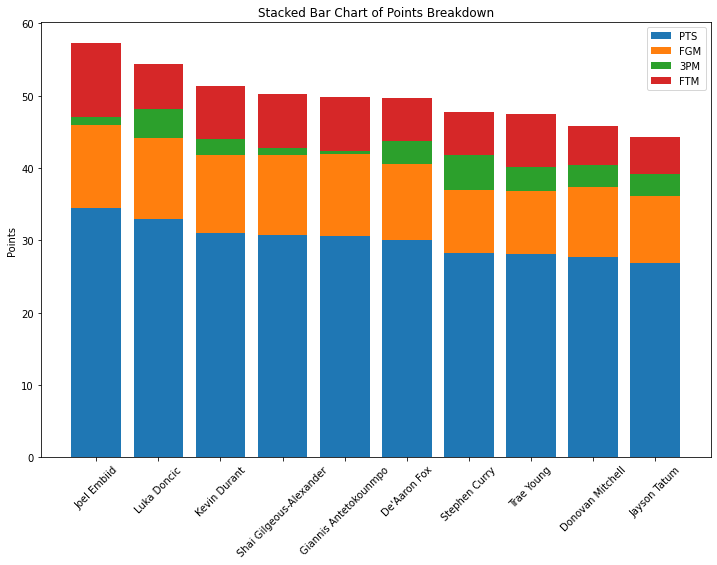

In [45]:
# Create stacked bar plot
fig, ax = plt.subplots(figsize=(12, 8))

# Stack the bars for different categories
bottom = None
for col in ['PTS', 'FGM', '3PM', 'FTM']:
    ax.bar(top_ten_df['PLAYER'], top_ten_df[col], label=col, bottom=bottom)
    if bottom is None:
        bottom = top_ten_df[col]
    else:
        bottom += top_ten_df[col]

ax.set_ylabel('Points')
ax.set_title('Stacked Bar Chart of Points Breakdown')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [46]:
# Create a dataframe for players with the most rebounds
top_ten_rebounds = df.loc[df['REB'] > 4].head(10)
top_ten_rebounds = top_ten_rebounds[['PLAYER', 'YEAR', 'MIN', 'PTS', 'REB']]
top_ten_rebounds_sorted = top_ten_rebounds.sort_values(by='REB', ascending=False)

In [47]:
print(top_ten_rebounds_sorted)

                     PLAYER     YEAR   MIN   PTS   REB
11             Nikola Jokic  2023-24  33.3  26.3  12.3
1               Joel Embiid  2023-24  34.0  34.4  11.8
5     Giannis Antetokounmpo  2023-24  34.7  30.6  11.1
10             Jayson Tatum  2023-24  36.8  26.8   8.7
2               Luka Doncic  2023-24  36.7  32.9   8.4
3              Kevin Durant  2023-24  36.7  31.0   6.1
4   Shai Gilgeous-Alexander  2023-24  34.7  30.7   5.7
9          Donovan Mitchell  2023-24  36.5  27.7   5.6
7             Stephen Curry  2023-24  33.9  28.2   4.7
6              De'Aaron Fox  2023-24  35.4  30.1   4.4


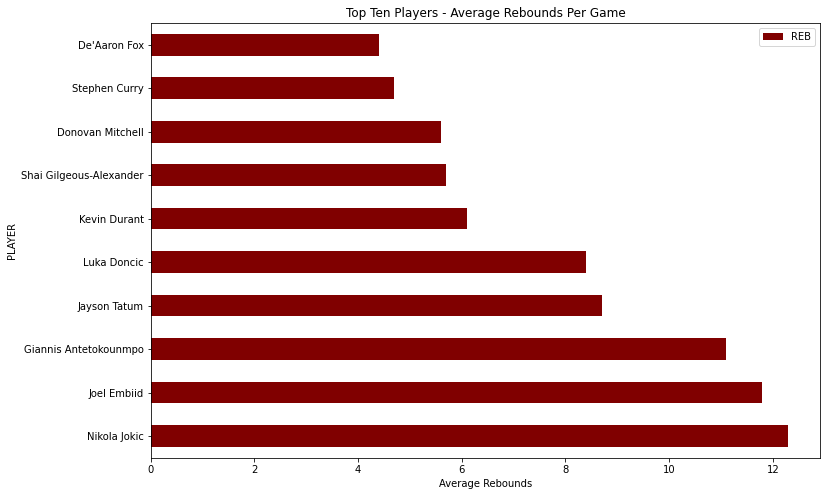

In [48]:
# Plotting bars in descending order
top_ten_rebounds_sorted.plot.barh(x='PLAYER', y='REB', color='maroon', figsize=(12, 8))

# Adding labels and title
plt.xlabel('Average Rebounds')
plt.title('Top Ten Players - Average Rebounds Per Game')

# Display the plot
plt.show()

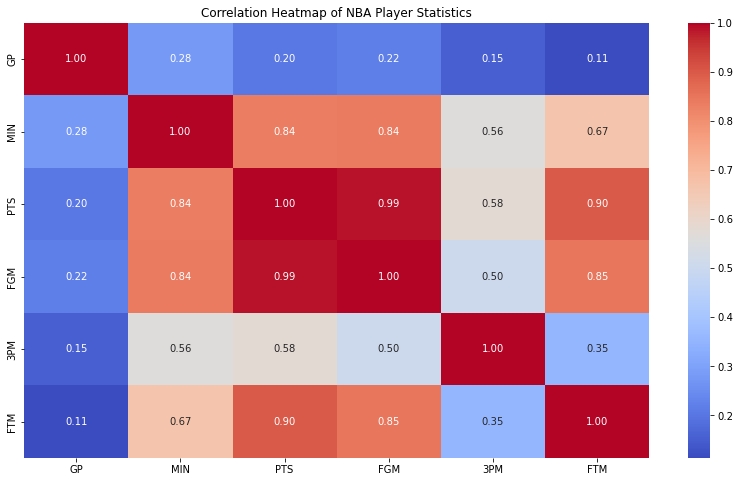

In [49]:
heatmap_columns = ['GP', 'MIN', 'PTS', 'FGM', '3PM', 'FTM']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]

# Create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of NBA Player Statistics')
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 1 to 260
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PLAYER  260 non-null    object 
 1   YEAR    260 non-null    object 
 2   TEAM    260 non-null    object 
 3   GP      260 non-null    float64
 4   MIN     260 non-null    float64
 5   PTS     260 non-null    float64
 6   FGM     260 non-null    float64
 7   FGA     260 non-null    float64
 8   FG%     260 non-null    float64
 9   3PM     260 non-null    float64
 10  3PA     260 non-null    float64
 11  3P%     260 non-null    float64
 12  FTM     260 non-null    float64
 13  FTA     260 non-null    float64
 14  FT%     260 non-null    float64
 15  OREB    260 non-null    float64
 16  DREB    260 non-null    float64
 17  REB     260 non-null    float64
 18  AST     260 non-null    float64
 19  STL     260 non-null    float64
 20  BLK     260 non-null    float64
 21  TOV     260 non-null    float64
 22  EF

In [51]:
# Export cleaned data frame
file_path = 'nba_cleaned_data.csv'
df.to_csv(file_path, index=False)